In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/sample_data/wildfire_westernghats.xlsx")


In [ ]:
data

,incident_id,date,cause,size,vegetation_type,fuel_moisture_content,fuel_load,slope,elevation,aspect,...,wind_speed,wind_direction,precipitation,solar_radiation,proximity_to_urban,population_density,access_roads,previous_fire_dates,previous_fire_sizes,previous_fire_durations
0,1,25-12-2022,Unknown,373.67,Forest,6.32,34.73,19.26,695.80,W,...,3.90,SW,6.66,746.68,5.86,421.01,True,"2009-03-13, 2015-11-23",77,"98 hrs, 54 hrs"
1,2,23-05-2024,Campfire,211.94,Forest,23.06,15.24,8.85,1790.69,NE,...,1.19,N,163.96,114.05,25.46,328.92,True,"2002-07-21, 2015-12-27, 2004-05-08","409, 287","44 hrs, 51 hrs, 53 hrs"
2,3,10-05-2022,Human Activity,222.06,Grassland,10.54,39.81,14.68,1879.28,S,...,0.05,NW,51.21,452.35,14.64,253.39,True,"2018-06-13, 2019-04-20, 2014-06-13","380, 198","31 hrs, 60 hrs, 85 hrs"
3,4,29-08-2023,Human Activity,342.62,Shrubland,21.29,36.36,10.52,1065.68,SE,...,16.11,SW,148.07,214.85,43.71,262.12,True,"2003-05-11, 2018-07-18, 2000-01-12, 2009-10-18","70, 249, 191","98 hrs, 93 hrs"
4,5,01-12-2020,Agricultural Burns,199.23,Shrubland,6.12,49.99,26.34,1817.21,NE,...,5.91,NE,89.43,117.43,1.02,32.64,True,"2024-03-18, 2005-02-18","461, 470, 414","2 hrs, 57 hrs, 68 hrs"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,01-04-2021,Unknown,287.05,Grassland,20.37,15.27,6.88,1013.13,N,...,7.47,N,75.39,659.83,41.89,306.38,False,16-11-2010,"462, 160","66 hrs, 83 hrs, 52 hrs"
4996,4997,14-05-2023,Campfire,92.42,Forest,29.46,21.99,16.53,1097.71,NE,...,9.95,SW,45.85,888.97,29.45,272.46,True,"2004-12-11, 2022-02-10, 2004-03-27, 2014-03-25",252,43 hrs
4997,4998,09-05-2020,Agricultural Burns,292.50,Shrubland,10.28,48.08,30.99,652.38,E,...,11.98,S,47.66,916.03,32.31,84.36,True,21-10-2004,334,"38 hrs, 85 hrs, 70 hrs"
4998,4999,09-09-2020,Campfire,498.47,Forest,23.04,25.24,42.61,1804.39,W,...,19.76,E,138.00,747.28,4.81,274.41,True,"2023-07-11, 2010-03-10, 2020-03-12","162, 242, 74, 129",96 hrs


In [ ]:
data.shape

(5000, 24)

In [ ]:
print("Data Summary:")
print(data.describe())

Data Summary:
       incident_id         size  fuel_moisture_content    fuel_load  \
count  5000.000000  5000.000000            5000.000000  5000.000000   
mean   2500.500000   277.089734              17.536844    30.063390   
std    1443.520003   129.852322               7.193766    11.529859   
min       1.000000    50.130000               5.000000    10.000000   
25%    1250.750000   166.020000              11.200000    20.377500   
50%    2500.500000   276.710000              17.730000    30.065000   
75%    3750.250000   389.857500              23.720000    39.970000   
max    5000.000000   499.980000              30.000000    50.000000   

             slope    elevation  temperature     humidity   wind_speed  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     22.364064  1123.029636    32.380838    49.537900    10.039150   
std      13.055978   518.051507     7.164419    23.145715     5.792485   
min       0.000000   200.190000    20.000000    10

In [ ]:
#Checking for the null values
data.isnull().sum()

incident_id                0
date                       0
cause                      0
size                       0
vegetation_type            0
fuel_moisture_content      0
fuel_load                  0
slope                      0
elevation                  0
aspect                     0
land_use                   0
land_cover                 0
temperature                0
humidity                   0
wind_speed                 0
wind_direction             0
precipitation              0
solar_radiation            0
proximity_to_urban         0
population_density         0
access_roads               0
previous_fire_dates        0
previous_fire_sizes        0
previous_fire_durations    0
dtype: int64

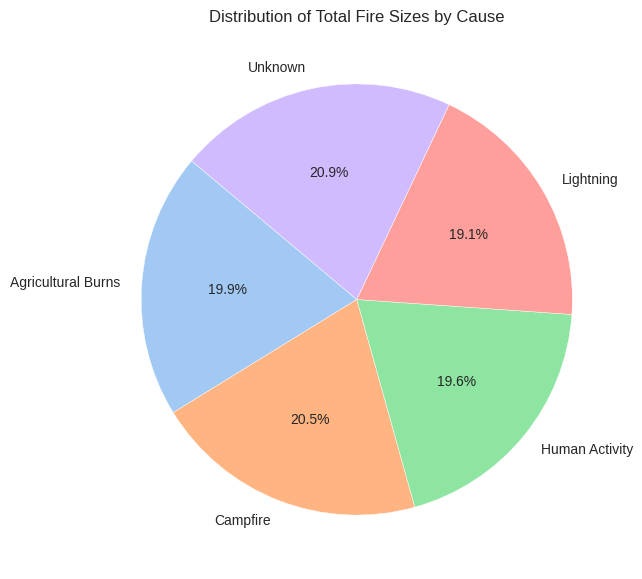

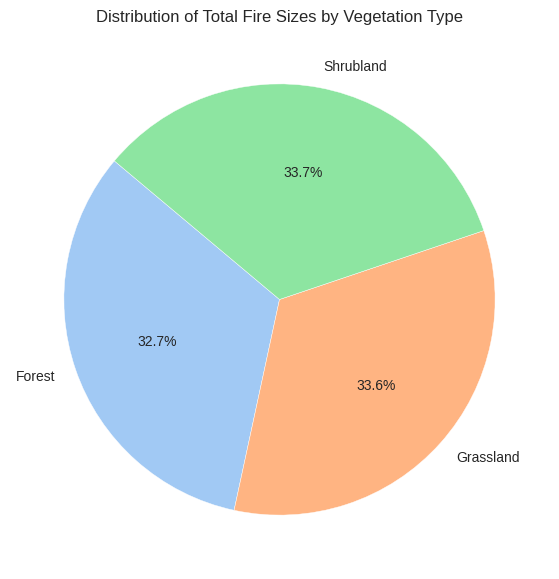

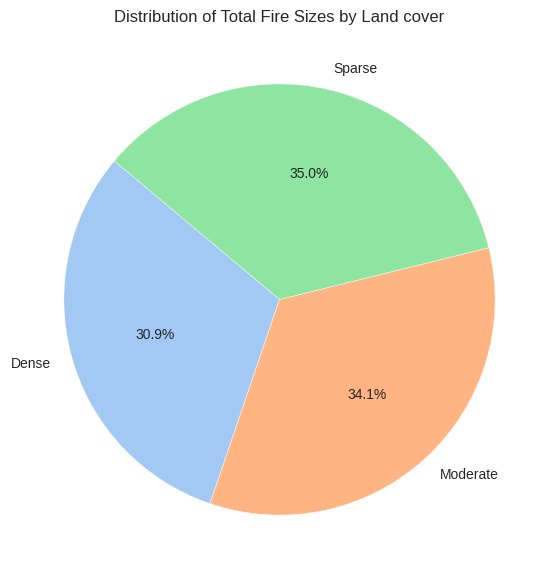

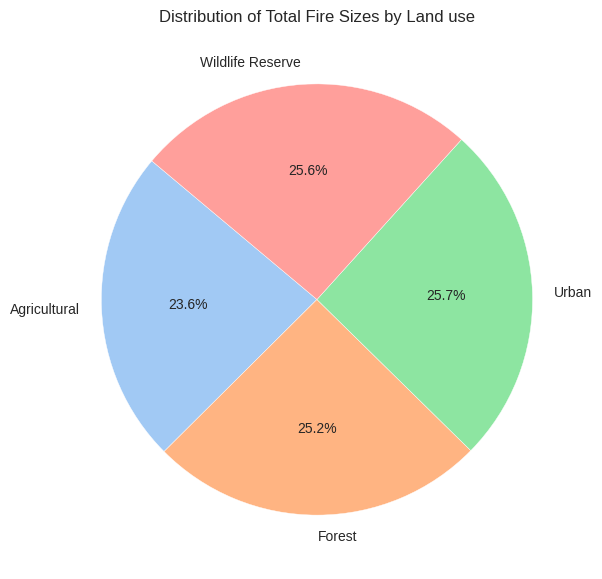

In [ ]:
#pie chart of Total Fire Sizes by Cause
size_by_cause = data.groupby('cause')['size'].sum()
plt.figure(figsize=(10, 7))
plt.pie(size_by_cause, labels=size_by_cause.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Total Fire Sizes by Cause')
plt.show()
#pie chart of Total Fire Sizes by Vegetation Type
size_by_vegetation = data.groupby('vegetation_type')['size'].sum()
plt.figure(figsize=(10, 7))
plt.pie(size_by_vegetation, labels=size_by_vegetation.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Total Fire Sizes by Vegetation Type')
plt.show()
#pie chart of Total Fire Sizes by Land cover
size_by_landcover = data.groupby('land_cover')['size'].sum()
plt.figure(figsize=(10, 7))
plt.pie(size_by_landcover, labels=size_by_landcover.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Total Fire Sizes by Land cover')
plt.show()
#pie chart of Total Fire Sizes by Land use
size_by_landuse = data.groupby('land_use')['size'].sum()
plt.figure(figsize=(10, 7))
plt.pie(size_by_landuse, labels=size_by_landuse.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Total Fire Sizes by Land use')
plt.show()

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['cause','vegetation_type', 'aspect', 'land_use','land_cover', 'wind_direction', 'access_roads'], drop_first=1)
data.head()

,incident_id,date,size,fuel_moisture_content,fuel_load,slope,elevation,temperature,humidity,wind_speed,...,land_cover_Moderate,land_cover_Sparse,wind_direction_N,wind_direction_NE,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SW,wind_direction_W,access_roads_True
0,1,25-12-2022,373.67,6.32,34.73,19.26,695.80,29.19,12.85,3.90,...,True,False,False,False,False,False,False,True,False,True
1,2,23-05-2024,211.94,23.06,15.24,8.85,1790.69,36.86,27.51,1.19,...,False,True,True,False,False,False,False,False,False,True
2,3,10-05-2022,222.06,10.54,39.81,14.68,1879.28,38.68,32.47,0.05,...,False,True,False,False,True,False,False,False,False,True
3,4,29-08-2023,342.62,21.29,36.36,10.52,1065.68,27.12,54.23,16.11,...,False,True,False,False,False,False,False,True,False,True
4,5,01-12-2020,199.23,6.12,49.99,26.34,1817.21,37.73,63.46,5.91,...,False,True,False,True,False,False,False,False,False,True


In [ ]:
# Define features (X) and target (y)
X = data.drop(columns=['incident_id', 'date', 'previous_fire_dates', 'previous_fire_sizes', 'previous_fire_durations'])
y = data['size']

<ipython-input-208-1280eb599327>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


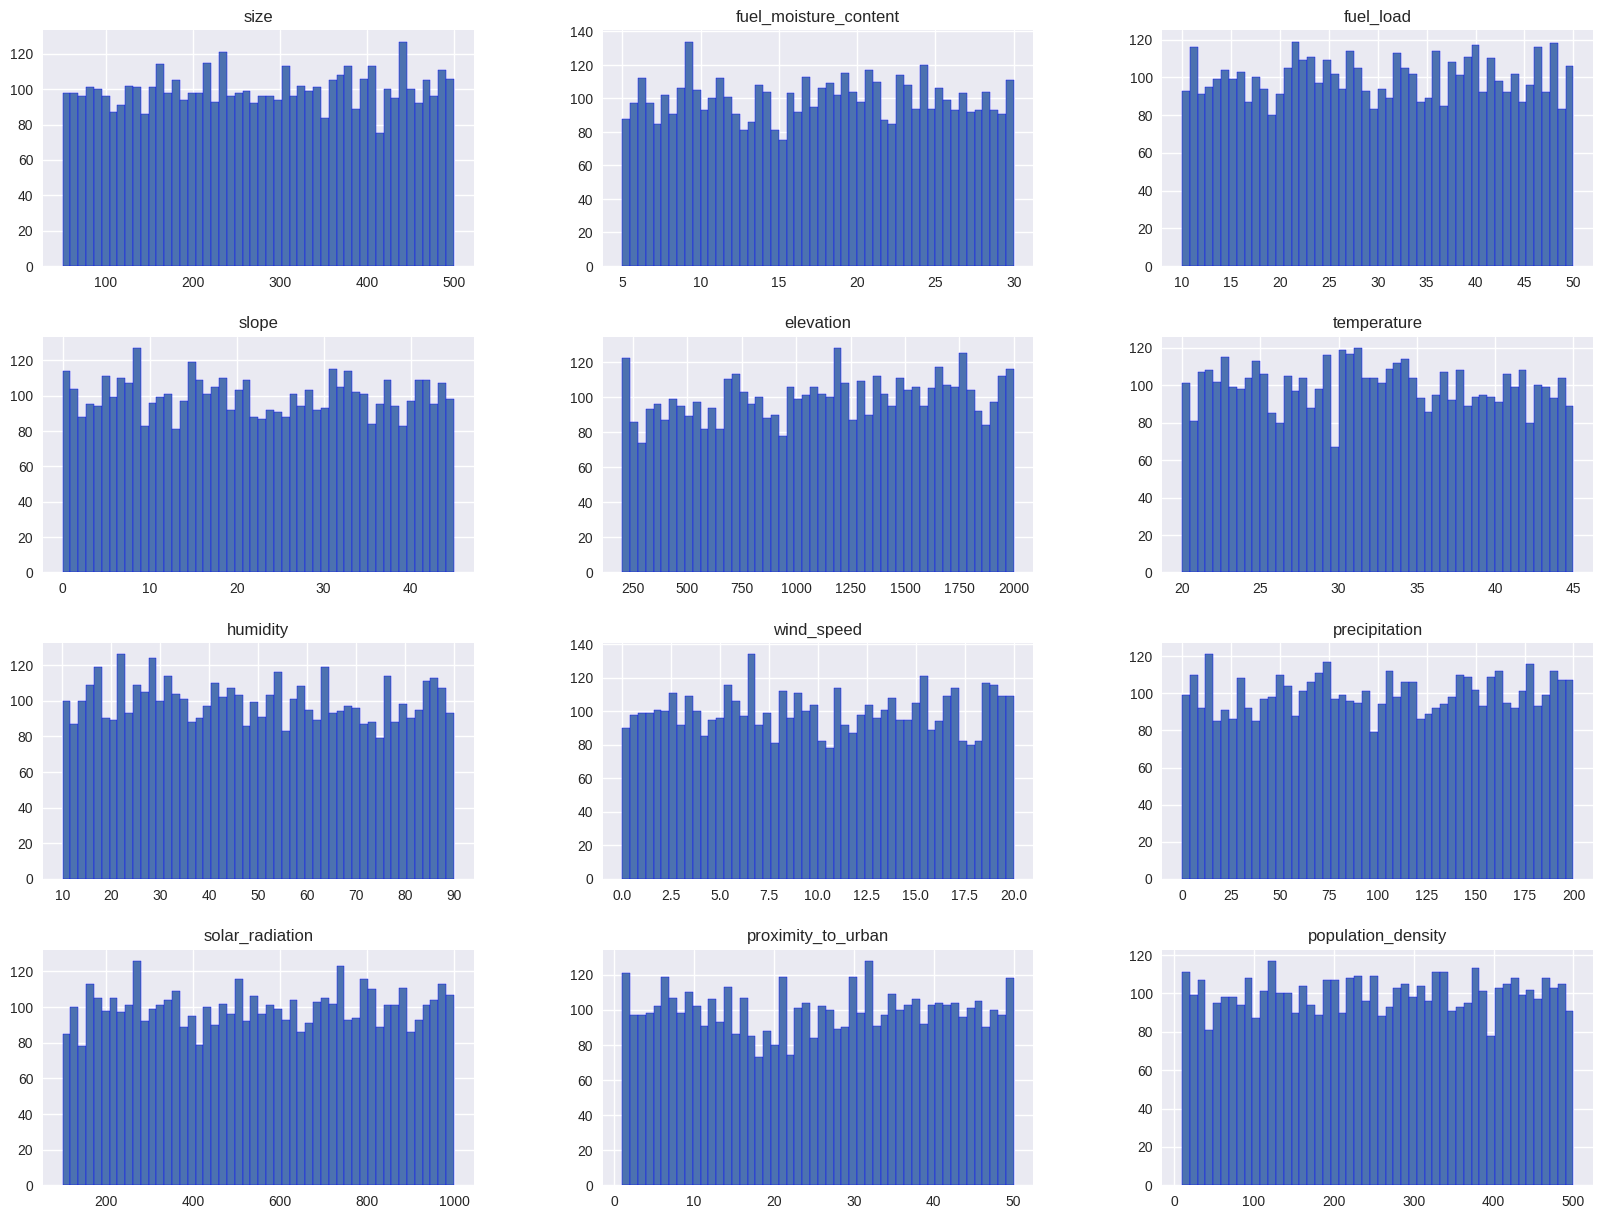

In [ ]:
plt.style.use('seaborn')
X.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 38), (1000, 38), (4000,), (1000,))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_accuracy=linear_reg.score(X_test_scaled,y_test)*100


In [ ]:
# Apply Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_r2 = r2_score(y_test, y_pred_gbr)
gbr_accuracy=gbr.score(X_test_scaled,y_test)*100

In [ ]:
# Apply Decision Tree Regression
dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
y_pred_dtr = dtr.predict(X_test_scaled)
dtr_mse = mean_squared_error(y_test, y_pred_dtr)
dtr_r2 = r2_score(y_test, y_pred_dtr)
dtr_accuracy=dtr.score(X_test_scaled,y_test)*100

In [ ]:
# Visualize the results using regplot and lmplot
plt.figure(figsize=(18, 10))

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

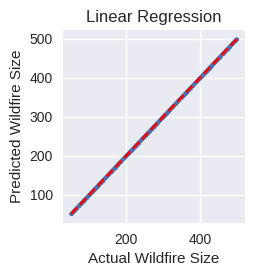

In [ ]:
#Linear Regression plot
plt.subplot(2, 3, 1)
sns.regplot(x=y_test, y=y_pred_linear, scatter_kws={'s':5})
plt.xlabel('Actual Wildfire Size')
plt.ylabel('Predicted Wildfire Size')
plt.title('Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

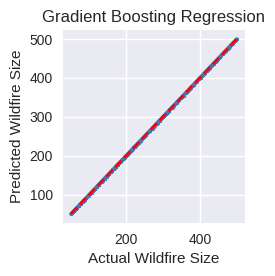

In [ ]:
# Gradient Boosting Regression plot
plt.subplot(2, 3, 2)
sns.regplot(x=y_test, y=y_pred_gbr, scatter_kws={'s':5})
plt.xlabel('Actual Wildfire Size')
plt.ylabel('Predicted Wildfire Size')
plt.title('Gradient Boosting Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

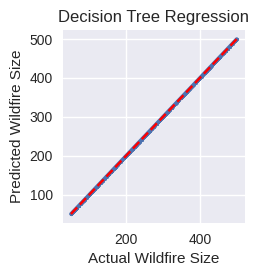

In [ ]:
plt.subplot(2, 3, 3)
sns.regplot(x=y_test, y=y_pred_dtr, scatter_kws={'s':5})
plt.xlabel('Actual Wildfire Size')
plt.ylabel('Predicted Wildfire Size')
plt.title('Decision Tree Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

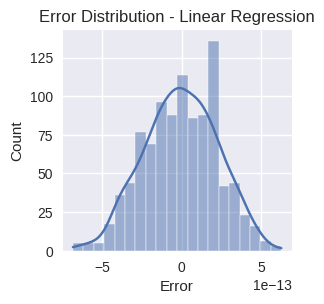

In [ ]:
 #Distribution of errors for Linear Regression
plt.subplot(2, 3, 4)
sns.histplot(y_test - y_pred_linear, kde=True, bins=20)
plt.xlabel('Error')
plt.title('Error Distribution - Linear Regression')
plt.tight_layout()
plt.show()

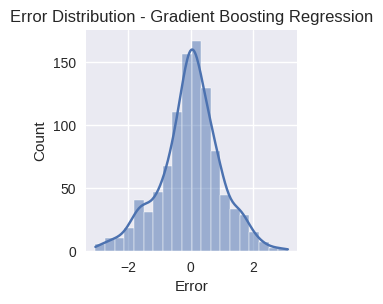

In [ ]:
# Distribution of errors for Gradient Boosting Regression
plt.subplot(2, 3, 5)
sns.histplot(y_test - y_pred_gbr, kde=True, bins=20)
plt.xlabel('Error')
plt.title('Error Distribution - Gradient Boosting Regression')
plt.tight_layout()
plt.show()

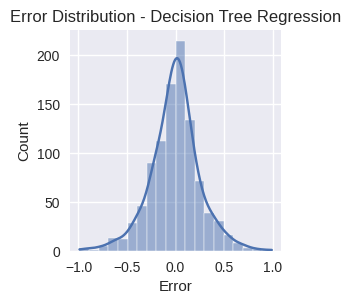

In [ ]:
# Distribution of errors for Decision Tree Regression
plt.subplot(2, 3, 6)
sns.histplot(y_test - y_pred_dtr, kde=True, bins=20)
plt.xlabel('Error')
plt.title('Error Distribution - Decision Tree Regression')
plt.tight_layout()
plt.show()

In [ ]:
# Checking Accuracy, Mean Squared Errors and R2 Score
print(f'Linear Regression Accurary: {linear_accuracy} % ,MSE: {linear_mse}, R2: {linear_r2}')
print(f'Gradient Boosting Regression Accuracy: {gbr_accuracy} % ,MSE: {gbr_mse}, R2: {gbr_r2}')
print(f'Decision Tree Regression Accuracy: {dtr_accuracy} % ,MSE: {dtr_mse}, R2: {dtr_r2}')

Linear Regression Accurary: 100.0 % ,MSE: 5.301488595351151e-26, R2: 1.0
Gradient Boosting Regression Accuracy: 99.99431613159999 % ,MSE: 0.9329103920154681, R2: 0.9999431613159999
Decision Tree Regression Accuracy: 99.9996116722497 % ,MSE: 0.06373740000000053, R2: 0.999996116722497
